MAE of predicted sale price based some numerical features:
75.47945205479452
MAE of validation data using train_test_split function: 
26680.008219178082
 
best max leaf nodes = 70
 
MAE of validation data using train_test_split function and best max leaf nodes: 
25741.67843825867
 
MAE for random forest regressor: 
17600.08701369863
 
MAE for random forest regressor and best max leaf nodes: 
17495.546827538597
best leaf node for random forest = 663


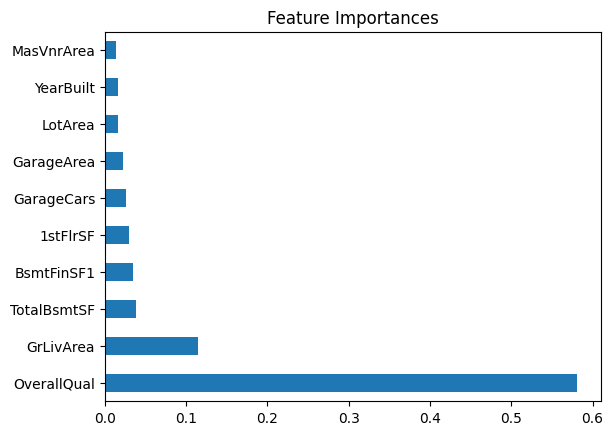

In [70]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
'''
Remember answer is in form ID, predicted price!!!   
'''

#importing the data
iowa_file_train = 'train.csv'
iowa_train_data = pd.read_csv(iowa_file_train)
iowa_file_test = 'test.csv' 
iowa_test_data = pd.read_csv(iowa_file_test)


#This code predicts the sale price of the first 5 properties based on certain features.

y = iowa_train_data.SalePrice  #column of SalePrice
#print(iowa_data.columns)
iowa_features = ['MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
X = iowa_train_data[iowa_features]
iowa_model = DecisionTreeRegressor(random_state =1)
iowa_model.fit(X,y)
predicted_home_prices = iowa_model.predict(X)
print('MAE of predicted sale price based some numerical features:')
#this prediction has a low MAE because DecisionTreeRegressor overfits and fits perfectly to the data


#calculating mean absolute error for for data based of features.
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y,predicted_home_prices))

#split training data into training and validation in order to test our model is accurate for new data.
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=0)
iowa_model = DecisionTreeRegressor()
iowa_model.fit(train_X,train_y) 
val_predictions = iowa_model.predict(val_X)
print('MAE of validation data using train_test_split function: ')
print(mean_absolute_error(val_y,val_predictions))
#this error is very large because decision tree regressor OVERFITS so it is not an accurate model for new unseen data. 

#define get_mae a function using max_leaf_nodes
def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes,random_state = 1)
    model.fit(train_X,train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y,preds_val)
    return(mae)
best_max_leaf_nodes = 70
print(' ')
print('best max leaf nodes = 70')

#using best max leaf nodes
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=0)
iowa_model = DecisionTreeRegressor(max_leaf_nodes=70,random_state =0)
iowa_model.fit(train_X,train_y) 
val_predictions = iowa_model.predict(val_X)
print(' ')
print('MAE of validation data using train_test_split function and best max leaf nodes: ')
print(mean_absolute_error(val_y,val_predictions))


#using random forest
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
iowa_preds = forest_model.predict(val_X)
print(' ')
print('MAE for random forest regressor: ')
print(mean_absolute_error(val_y, iowa_preds))

#using random forest and max_leaf_nodes
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_leaf_nodes=663,random_state=1)
forest_model.fit(train_X, train_y)
iowa_preds = forest_model.predict(val_X)
print(' ')
print('MAE for random forest regressor and best max leaf nodes: ')
print(mean_absolute_error(val_y, iowa_preds))

print('best leaf node for random forest = 663')
#Actual submission for competition, using our lowest MAE through random forest + 445 max leaf nodes:
Id = iowa_test_data.Id  #making a variable which is a list of all Id numbers
iowa_features = ['MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
X = iowa_test_data[iowa_features]
'''
for max_leaf_nodes in [663]:
    print(' ')
    print('candidate is:')
    print(get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y))
'''


import matplotlib.pyplot as plt

feature_importances = pd.Series(forest_model.feature_importances_, index=iowa_features)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances")
plt.show()

